<a href="https://colab.research.google.com/github/fisicorj/astrofisica/blob/main/black_body_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

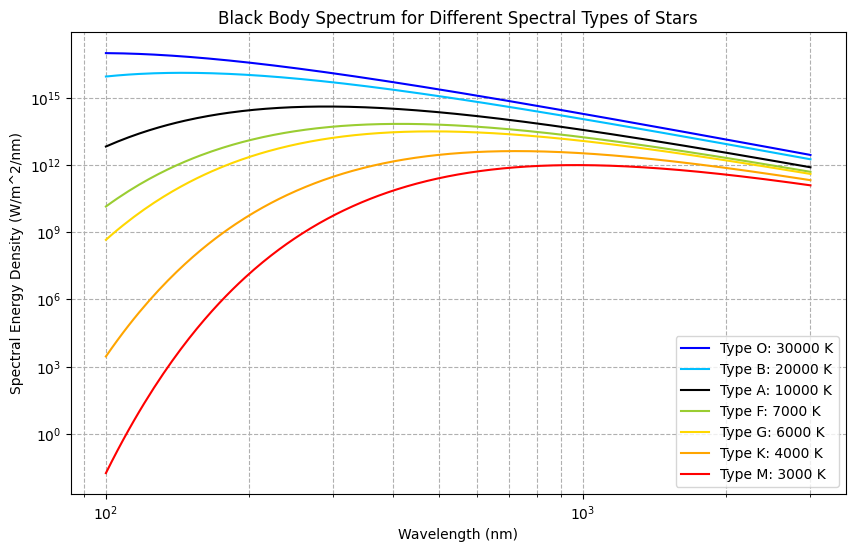

In [8]:
import numpy as np
import scipy.constants as const
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Dictionary of spectral types with their temperatures and descriptions
spectral_types = {
    'O': (30000, 'Blue, He ionized (strong), heavy elements ionized (OIII, NIII, SiIV), weak H lines'),
    'B': (20000, 'Bluish, He neutral (moderate), heavy elements ionized once - Rigel (B8)'),
    'A': (10000, 'White, He neutral (very weak), ionized, H (strong) - Vega (A0) and Sirius (A1)'),
    'F': (7000, 'Yellowish, heavy elements ionized once, neutral metals (FeI, CaI), H (moderate) - Canopus (F0)'),
    'G': (6000, 'Yellow, heavy elements ionized once, neutral metals, H (relatively weak) - Sun (G2) and Alpha Cen (G2)'),
    'K': (4000, 'Orange, heavy elements ionized once, neutral metals, H (weak) - Arcturus (K2) and Aldebaran (K5)'),
    'M': (3000, 'Red, neutral atoms (strong), molecular (moderate), H (very weak) - Betelgeuse (M2)')
}

# Define colors for each spectral type
colors = {
    'O': 'blue',
    'B': 'deepskyblue',
    'A': 'black',
    'F': 'yellowgreen',
    'G': 'gold',
    'K': 'orange',
    'M': 'red'
}

def planck(wavelength, temperature):
    """
    Calculates the spectral energy density of a black body according to Planck's Law.

    Args:
        wavelength (float): Wavelength (in meters).
        temperature (float): Temperature of the star (in Kelvin).

    Returns:
        float: Spectral energy density (in W/m^2/m).
    """
    x = const.h * const.c / (wavelength * const.k * temperature)
    # To avoid overflow in the exponential function
    with np.errstate(over='ignore'):
        exp_term = np.exp(np.clip(x, None, 700))  # Limit the maximum value of x to avoid overflow
    intensity = 2 * const.h * const.c**2 / wavelength**5 / (exp_term - 1)
    return intensity

def peak_wavelength(temperature):
    """
    Calculates the peak wavelength of the spectrum for a given temperature.

    Args:
        temperature (float): Temperature of the star (in Kelvin).

    Returns:
        float: Peak wavelength (in meters).
    """
    return 2.8977729e-3 / temperature

def optical_emission_percentage(temperature):
    """
    Calculates the percentage of emission in the optical range for a given temperature.

    Args:
        temperature (float): Temperature of the star (in Kelvin).

    Returns:
        float: Percentage of emission in the optical range.
    """
    lower_limit = 390e-9  # 390 nm in meters
    upper_limit = 700e-9  # 700 nm in meters

    optical_emission = integrate.quad(lambda x: planck(x, temperature), lower_limit, upper_limit)[0]
    total_emission = integrate.quad(lambda x: planck(x, temperature), 0, 10e-6)[0]

    return (optical_emission / total_emission) * 100

def plot_black_body_spectrum(x_scale='linear', y_scale='linear'):
    """
    Plots the black body spectrum for different spectral types of stars.

    Args:
        x_scale (str): Scale for the x-axis ('linear' or 'log').
        y_scale (str): Scale for the y-axis ('linear' or 'log').
    """
    wavelengths = np.linspace(100, 3000, 1000)  # Wavelength range for the plot in nanometers

    plt.figure(figsize=(10, 6))

    for spectral_type, (temperature, description) in spectral_types.items():
        plt.plot(wavelengths, planck(wavelengths * 1e-9, temperature), label=f'Type {spectral_type}: {temperature} K', color=colors[spectral_type])

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Spectral Energy Density (W/m^2/nm)')
    plt.title('Black Body Spectrum for Different Spectral Types of Stars')
    plt.xscale(x_scale)
    plt.yscale(y_scale)
    plt.legend()
    plt.grid(True, which='both', ls='--')
    plt.show()

def print_spectral_info():
    """
    Prints the peak wavelength and percentage of optical emission for each spectral type.
    """
    html_output = ""
    for spectral_type, (temperature, description) in spectral_types.items():
        peak = peak_wavelength(temperature)
        percentage_optical = optical_emission_percentage(temperature)
        color = colors[spectral_type]
        html_output += f'<p style="color:{color};"><strong>Spectral Type {spectral_type}:</strong> Peak Wavelength = {peak * 1e9:.2f} nm, Percentage of Optical Emission = {percentage_optical:.2f}%, Description: {description}</p>'
    display(HTML(html_output))

# Plot the spectrum with log-linear scales
plot_black_body_spectrum(x_scale='log', y_scale='log')

# Print the spectral information
print_spectral_info()

